### PROJECT WORK
### GROUP 9
### RIDE_SHARING

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import pandas as pd 

In [5]:
from scipy import stats

In [10]:
ride_sharing = pd.read_csv('ride_sharing.csv')

ride_sharing

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male
...,...,...,...,...,...,...,...,...,...
25755,11 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5063,1,2000,Male
25756,10 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5411,2,1998,Male
25757,14 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),5157,2,1995,Male
25758,14 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),4438,2,1995,Male


In [8]:
ride_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   duration         25760 non-null  object
 1   station_A_id     25760 non-null  int64 
 2   station_A_name   25760 non-null  object
 3   station_B_id     25760 non-null  int64 
 4   station_B_name   25760 non-null  object
 5   bike_id          25760 non-null  int64 
 6   user_type        25760 non-null  int64 
 7   user_birth_year  25760 non-null  int64 
 8   user_gender      25760 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.8+ MB


### OBJECTIVE 1: What is distribution of user gender across different bike id?

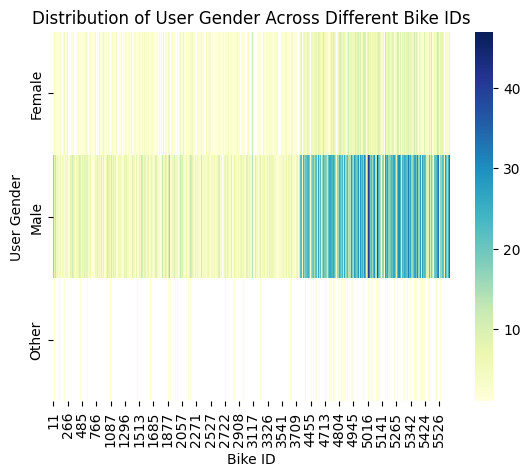

In [9]:
#Cleaning and preprocessing of the data:
# Ensure the data types are as expected
assert ride_sharing['user_gender'].dtype == 'object'
assert ride_sharing['bike_id'].dtype == 'int64'

# Drop rows with missing values if any
ride_sharing.dropna(inplace=True)

#Count the number of users per bike ID and gender:
grouped = ride_sharing.groupby(['bike_id', 'user_gender']).size().reset_index(name='counts')

#Pivoting the data to have bike IDs as columns and gender as rows:
pivot_data = grouped.pivot(index='user_gender', columns='bike_id', values='counts')

#Plot the distribution using seaborn:
sns.heatmap(pivot_data, cmap='YlGnBu')
plt.title('Distribution of User Gender Across Different Bike IDs')
plt.xlabel('Bike ID')
plt.ylabel('User Gender')
plt.show()

#### OBJECTIVE 2:Is there any significant diffrence in the proportion of male and female user across different user types?

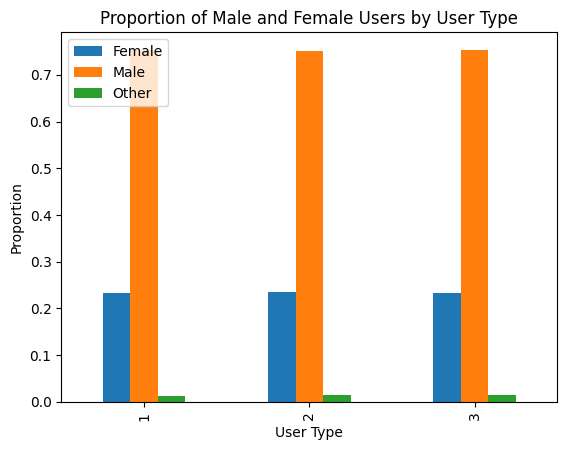

In [13]:
# GRAPHICAL VIEW OF THE SIGNIFICANT DIFFERENCE IN THE PROPORTION OF MALE AND FEMALE USERS ACROSS DIFFERENT USER TYPES


# Read the ride_sharing.csv file into a pandas DataFrame
data = pd.read_csv('ride_sharing.csv')

# Calculate the proportion of male and female users for each user type
grouped = data.groupby('user_type')['user_gender'].value_counts(normalize=True)

# Reset the index to create a DataFrame
grouped = grouped.reset_index(name='proportion')

# Pivot the DataFrame to create a matrix of proportions
pivot = grouped.pivot(index='user_type', columns='user_gender', values='proportion')

# Create a grouped bar plot
pivot.plot(kind='bar', title='Proportion of Male and Female Users by User Type')
plt.xlabel('User Type')
plt.ylabel('Proportion')
plt.legend(loc='upper left')
plt.show()

### OBJECTIVE 3:DO USER TYPES SHOW ANY PREFERENCE FOR SPECIFIC BIKE IDS?

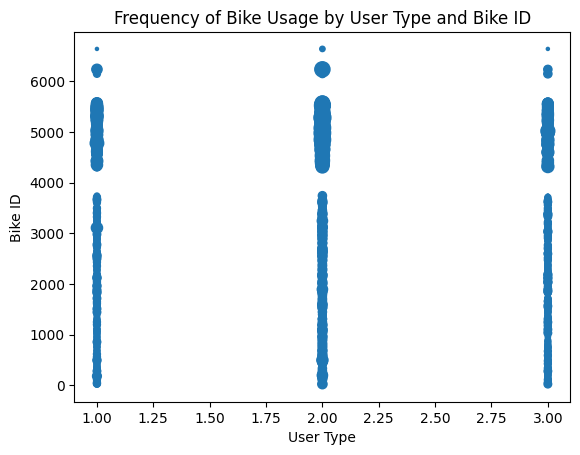

In [14]:
# # Read the ride_sharing.csv file into a pandas DataFrame
# data = pd.read_csv('ride_sharing.csv')

# Group the DataFrame by user type, bike ID, and count the frequency of each combination
grouped = data.groupby(['user_type', 'bike_id']).size().reset_index(name='frequency')

# Create a scatter plot with user type on the x-axis, bike ID on the y-axis, and frequency represented by the size of the points
plt.scatter(grouped['user_type'], grouped['bike_id'], s=grouped['frequency'] * 5)
plt.xlabel('User Type')
plt.ylabel('Bike ID')
plt.title('Frequency of Bike Usage by User Type and Bike ID')
plt.show()

#### Distribution of Bike IDs by User Type

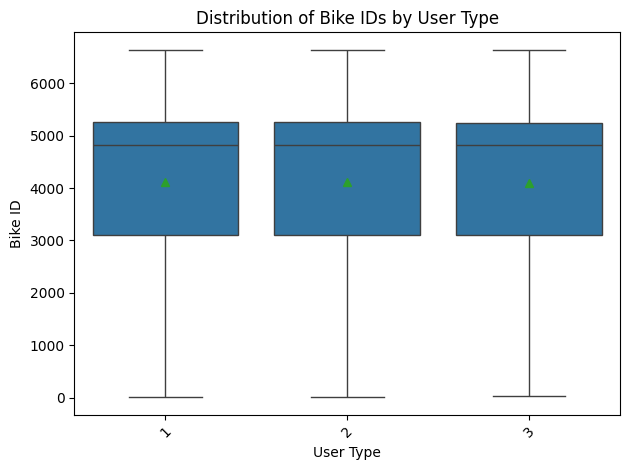

In [37]:
# Create the boxplot
sns.boxplot(
    x = "user_type",
    y = "bike_id",
    showmeans=True,  # Show the mean value for each box
    data=df
)

# Customize the plot (optional)
plt.title("Distribution of Bike IDs by User Type")
plt.xlabel("User Type")
plt.ylabel("Bike ID")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()


In [109]:
# help(pd.Series.str.split)

In [15]:
# import pandas as pd

# # Load the ride_sharing data from CSV
# df = pd.read_csv("ride_sharing.csv")

# Group data by birth year and calculate the average number of rides
average_rides_per_birth_year = df.groupby("user_birth_year")["user_type"].count()

# Identify the year with the highest average (assuming higher count indicates more rides)
year_with_highest_average = average_rides_per_birth_year.idxmax()
average_rides = average_rides_per_birth_year.max()

# Print the result
print(f"Average birth year for users who take the most rides: {year_with_highest_average}")
print(f"Average number of rides for users born in {year_with_highest_average}: {average_rides}")


Average birth year for users who take the most rides: 1988
Average number of rides for users born in 1988: 1741


#### Average Rides per Birth Year

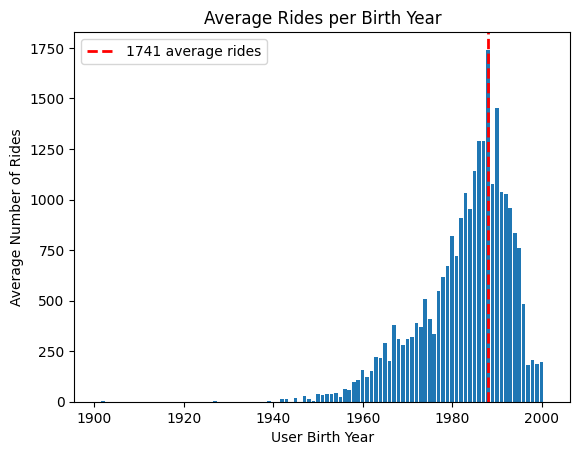

Average users born in 1988 take the most rides, with an average of 1741 rides.


In [16]:
# Group data by birth year and calculate the average number of rides
average_rides_per_year = df.groupby("user_birth_year")["user_type"].count()

# Find the birth year with the highest average number of rides
max_rides_year = average_rides_per_year.idxmax()
max_rides_average = average_rides_per_year.max()

# Create a bar chart to visualize the results
plt.bar(average_rides_per_year.index, average_rides_per_year.values)
plt.xlabel("User Birth Year")
plt.ylabel("Average Number of Rides")
plt.title("Average Rides per Birth Year")

# Highlight the year with the highest average
plt.axvline(x=max_rides_year, color='red', linestyle='dashed', linewidth=2, label=f"{int(max_rides_average)} average rides")
plt.legend()

# Display the plot
plt.show()

# Print the result (optional)
print(f"Average users born in {max_rides_year} take the most rides, with an average of {int(max_rides_average)} rides.")


### Top 5 frequently used station name in station B and user gender who used it frequently.

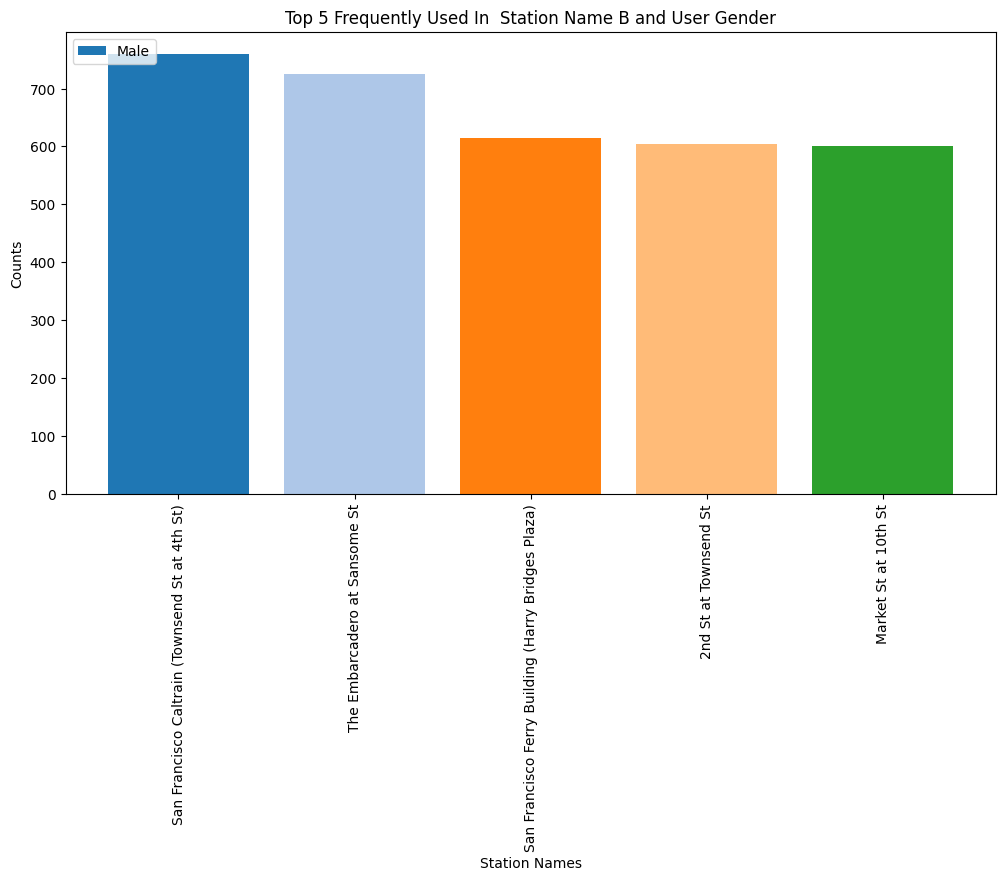

In [9]:
grouped = ride_sharing.groupby(['station_B_name', 'user_gender']).size().reset_index(name='counts')

top_5 = grouped.sort_values('counts', ascending=False).head(5)

plt.figure(figsize=(12, 6))
plt.bar(top_5['station_B_name'], top_5['counts'], color=[plt.cm.tab20(i) for i in range(5)])
plt.xlabel('Station Names')
plt.ylabel('Counts')
plt.title('Top 5 Frequently Used In  Station Name B and User Gender')
plt.xticks(rotation=90)
plt.legend(['Male', 'Female', 'Other'], loc='upper left')
plt.show()

#### Top 5 Frequently Used Station Name A and User Gender

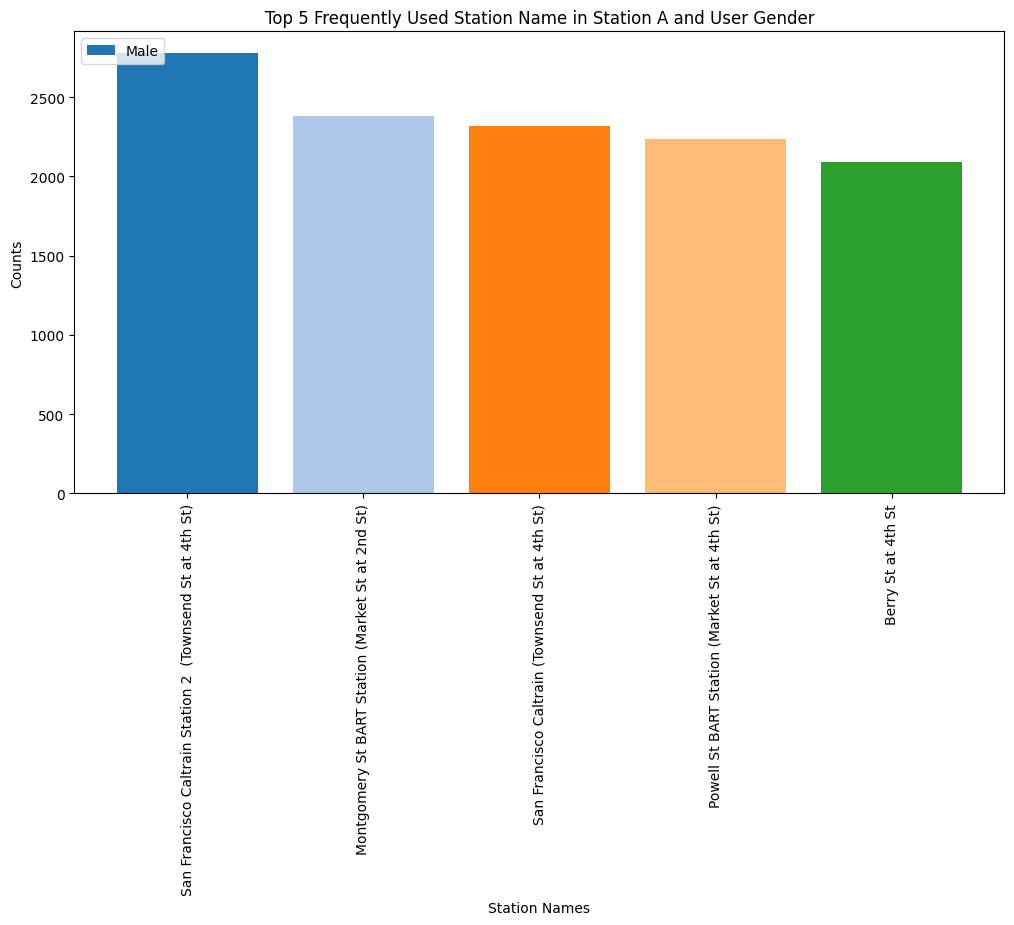

In [129]:
grouped = ride_sharing.groupby(['station_A_name', 'user_gender']).size().reset_index(name='counts')

top_5 = grouped.sort_values('counts', ascending=False).head(5)

plt.figure(figsize=(12, 6))
plt.bar(top_5['station_A_name'], top_5['counts'], color=[plt.cm.tab20(i) for i in range(5)])
plt.xlabel('Station Names')
plt.ylabel('Counts')
plt.title('Top 5 Frequently Used Station Name in Station A and User Gender')
plt.xticks(rotation=90)
plt.legend(['Male', 'Female', 'Other'], loc='upper left')
plt.show()

#### Duration by user_gender and bike_id

Unique values of user_gender:  ['Male' 'Female' 'Other']
Unique values of bike_id:  [5480 5193 3652 ... 3077  156 5259]


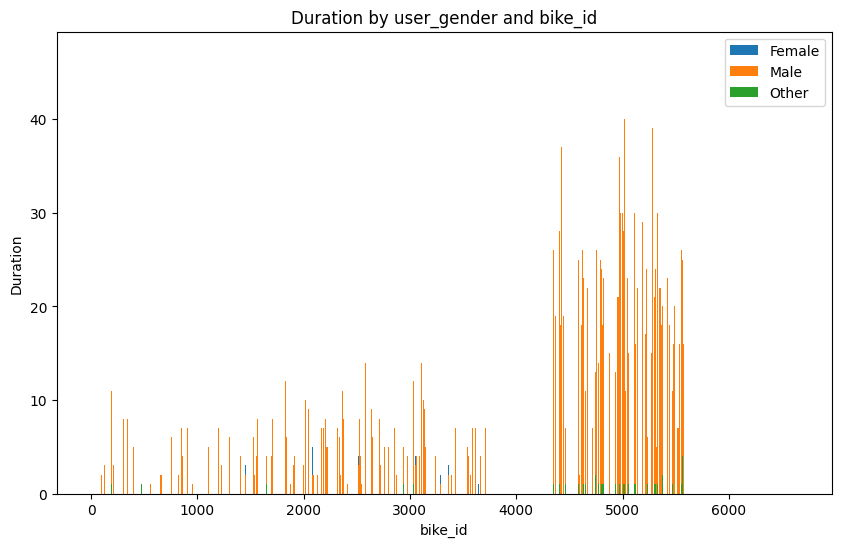

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
ride_sharing = pd.read_csv('ride_sharing.csv')

# Check the unique values of user_gender and bike_id
print("Unique values of user_gender: ", ride_sharing['user_gender'].unique())
print("Unique values of bike_id: ", ride_sharing['bike_id'].unique())

# Group the data by user_gender and bike_id
grouped = ride_sharing.groupby(['user_gender', 'bike_id'])['duration'].count().reset_index()

# Visualize the results
plt.figure(figsize=(10, 6))
for i, gender in enumerate(grouped['user_gender'].unique()):
    subset = grouped[grouped['user_gender'] == gender]
    plt.bar(subset['bike_id'], subset['duration'], label=gender)
plt.title('Duration by user_gender and bike_id')
plt.xlabel('bike_id')
plt.ylabel('Duration')
plt.legend()
plt.show()